# Exploratory Data Analysis on Air Quality Index in New York City

The goal of this note book is to perform some practical data analysis on the air quality index over New York city. Here we have used the open data available from 2005 to 2011.

From the website we used data set available at the URL, https://data.cityofnewyork.us/resource/ah89-62h9.csv for our analysis.

Here we are demonstrating, at high level, some of the chronic diseases in rise in various places in New York City because of the decrease in the air quality.

#       References
https://seaborn.pydata.org/
https://www.datacamp.com/community/tutorials/exploratory-data-analysis-python

First we download the data from website using the urllib.request, urllib.parse and urllib.error libraries and save it in the default locaiton.

In [58]:
%matplotlib inline

import os
import urllib.request, urllib.parse, urllib.error
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
if int(os.environ.get("MODERN_PANDAS_EPUB", 0)):
    import prep # noqa

pd.options.display.max_rows = 10
pd.options.display.max_columns = 30
sns.set(style='ticks', context='talk')

url = 'https://data.cityofnewyork.us/resource/ah89-62h9.csv'
 
print("Downloding the file...")
urllib.request.urlretrieve(url, "air_quality.csv")
 
print("\nFile is now downloaded.")
f = urllib.request.urlopen(url)
data = f.read()
with open("air_quality.csv", "wb") as code:
    code.write(data)

Downloding the file...

File is now downloaded.


Now the read the downloaded file...

In [59]:
fp = '/Users/ajaysimha/RBS MIT/Fall 2017/Introduction to Data Science/Homework_Assignments/My Homeworks/air_quality.csv'
 
aq = pd.read_csv(fp) 
aq.head()

,data_valuemessage,geo_entity_id,geo_entity_name,geo_type_name,indicator_data_id,indicator_id,measure,name,year_description
0,2.8,1,Bronx,Borough,130728,646,Average Concentration,Air Toxics Concentrations- Average Benzene Con...,2005
1,2.8,2,Brooklyn,Borough,130729,646,Average Concentration,Air Toxics Concentrations- Average Benzene Con...,2005
2,4.7,3,Manhattan,Borough,130730,646,Average Concentration,Air Toxics Concentrations- Average Benzene Con...,2005
3,1.9,4,Queens,Borough,130731,646,Average Concentration,Air Toxics Concentrations- Average Benzene Con...,2005
4,1.6,5,Staten Island,Borough,130732,646,Average Concentration,Air Toxics Concentrations- Average Benzene Con...,2005


Change the column names appropriately and create the axis column

In [60]:
column_names = {'data_valuemessage':'Data_ValueMessage','geo_entity_id': 'Geo_Entity_Id', 
                'geo_entity_name': 'Geo_Entity_Name', 'indicator_data_id': 'Indicator_Data_Id', 
                'indicator_id':'Indicator_Id', 'measure':'Measure','name':'Name',
                'year_description':'Year_Description'}

aq = (aq.rename(columns=column_names)
    .dropna(thresh=4) 
    [['Data_ValueMessage','Geo_Entity_Id', 'Geo_Entity_Name', 'Indicator_Data_Id', 'Indicator_Id', 'Measure',
     'Name', 'Year_Description']]         
    .rename_axis(["Geo_Axis"])
    .sort_index())
aq.head()

,Data_ValueMessage,Geo_Entity_Id,Geo_Entity_Name,Indicator_Data_Id,Indicator_Id,Measure,Name,Year_Description
Geo_Axis,,,,,,,,
0,2.8,1,Bronx,130728,646,Average Concentration,Air Toxics Concentrations- Average Benzene Con...,2005
1,2.8,2,Brooklyn,130729,646,Average Concentration,Air Toxics Concentrations- Average Benzene Con...,2005
2,4.7,3,Manhattan,130730,646,Average Concentration,Air Toxics Concentrations- Average Benzene Con...,2005
3,1.9,4,Queens,130731,646,Average Concentration,Air Toxics Concentrations- Average Benzene Con...,2005
4,1.6,5,Staten Island,130732,646,Average Concentration,Air Toxics Concentrations- Average Benzene Con...,2005


Checking for any null values in the data against the columns Measure, Name and Year Description

In [61]:
aq['Measure'].isnull().any()
aq['Name'].isnull().any()
aq['Year_Description'].isnull().any()

False

Once again print the clean data

In [63]:
aq.head()

,Data_ValueMessage,Geo_Entity_Id,Geo_Entity_Name,Indicator_Data_Id,Indicator_Id,Measure,Name,Year_Description
Geo_Axis,,,,,,,,
0,2.8,1,Bronx,130728,646,Average Concentration,Air Toxics Concentrations- Average Benzene Con...,2005
1,2.8,2,Brooklyn,130729,646,Average Concentration,Air Toxics Concentrations- Average Benzene Con...,2005
2,4.7,3,Manhattan,130730,646,Average Concentration,Air Toxics Concentrations- Average Benzene Con...,2005
3,1.9,4,Queens,130731,646,Average Concentration,Air Toxics Concentrations- Average Benzene Con...,2005
4,1.6,5,Staten Island,130732,646,Average Concentration,Air Toxics Concentrations- Average Benzene Con...,2005


Plotting histogram for Indicator_Id to display how there is variation in the air toxic concentrations.
As we can see, most of the air toxic is from carbon and nitric oxide

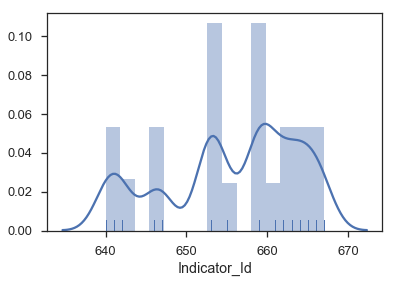

In [64]:
sns.distplot(aq['Indicator_Id'],kde = True, rug = True)

From below we can see that against Geo_Axis  the variations of the Indicator data id, informing us more about the toxic concentrations

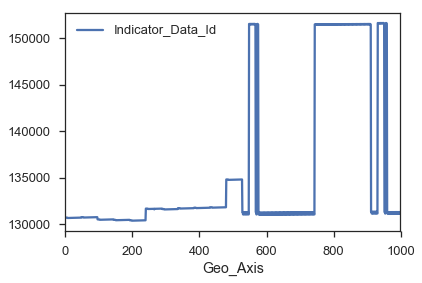

In [65]:
aq.plot(kind='line', y=['Indicator_Data_Id'])

From the below plot we observe that air toxicity is around the geo entity id 30

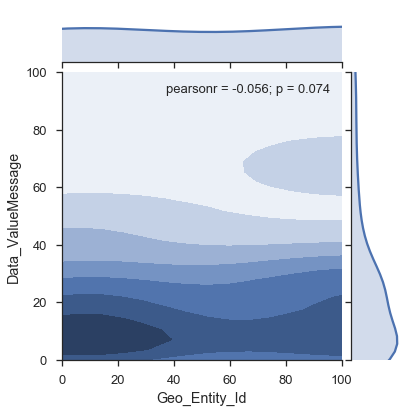

In [66]:
sns.jointplot(x='Geo_Entity_Id',y='Data_ValueMessage',data=aq,kind='kde',xlim={0,100},ylim={0,100})

Plotting the pair plot for Geo_Entity_Id v/s Data_ValueMessage v/s Indicator_Data_Id

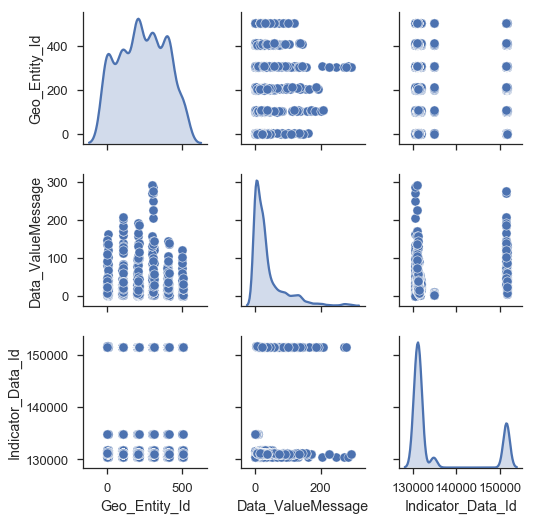

In [67]:
g = sns.pairplot(aq, diag_kind="kde",vars= ["Geo_Entity_Id","Data_ValueMessage","Indicator_Data_Id"]
                 ,diag_kws=dict(shade=True))